<a href="https://colab.research.google.com/github/alexjercan/mesh-pose-reconstruction/blob/master/tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/alexjercan/mesh-pose-reconstruction.git
%cd mesh-pose-reconstruction

import torch
from IPython.display import clear_output

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


In [ ]:
!bash ./data/get_bdataset.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3961      0 --:--:-- --:--:-- --:--:--  3961
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7497M    0 7497M    0     0  44.5M      0 --:--:--  0:02:48 --:--:-- 48.9M
Completed in 565 seconds


In [ ]:
# Download bdataset_tiny
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/bdataset_tiny.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../ && rm tmp.zip

In [ ]:
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/tiny.pth', 'tiny.pth')
torch.hub.download_url_to_file('https://github.com/alexjercan/mesh-pose-reconstruction/releases/download/v1.0/normal.pth', 'normal.pth')

In [ ]:
import config
from util.common import L_RGB, L_DEPTH, L_NORMAL

config.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Dataset Configuration
config.DATASET = 'bdataset'
config.USED_LAYERS = [L_RGB, L_DEPTH, L_NORMAL]
config.IMG_DIR = "../" + config.DATASET + "/images/"
config.MESH_DIR = "../" + config.DATASET + "/labels/"
config.NUM_WORKERS = 4
config.BATCH_SIZE = 4
config.IMAGE_SIZE = 224
config.MAP_SIZE = 32
config.NUM_CLASSES = 30
config.PIN_MEMORY = True
config.AUGMENT = False

# Model Configuration
config.ENCODER_LEARNING_RATE = 1e-3
config.DECODER_LEARNING_RATE = 1e-3
config.ENCODER_LR_MILESTONES = [150]
config.DECODER_LR_MILESTONES = [150]
config.BETAS = (.9, .999)
config.GAMMA = .5
config.WEIGHT_DECAY = 1e-4

# Train Configuration
config.NUM_EPOCHS = 40
config.OUT_PATH = './runs'
config.TEST = True

# Test/Detect Configuration
config.DETECT_PATH = "./data/images"
config.VOXEL_THRESH = 0.3
config.PLOT = False

# Checpoint Configuration
config.LOAD_MODEL = True
config.SAVE_MODEL = True
config.CHECKPOINT_FILE = "normal.pth"

# Classes
config.NAMES = ['object01', 'object02', 'object03', 'object04', 'object05', 'object06', 'object07', 'object08', 'object09', 'object10',
                'object11', 'object12', 'object13', 'object14', 'object15', 'object16', 'object17', 'object18', 'object19', 'object20',
                'object21', 'object22', 'object23', 'object24', 'object25', 'object26', 'object27', 'object28', 'object29', 'object30']


In [ ]:
from train import train
train()

  0%|          | 0/2008 [00:00<?, ?it/s]

In [ ]:
config.LOAD_MODEL = True
config.CHECKPOINT_FILE = "normal.pth"

In [ ]:
from test import test
test()

100%|██████████| 2008/2008 [07:16<00:00,  4.60it/s, loss=0.00501, mean_iou=0.687]


In [ ]:
config.DETECT_PATH = "./data/images"

image 1/4 data/images/000000rgb.png


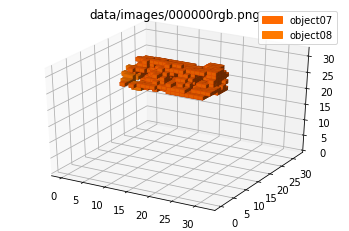

image 2/4 data/images/0022_000009rgb.png


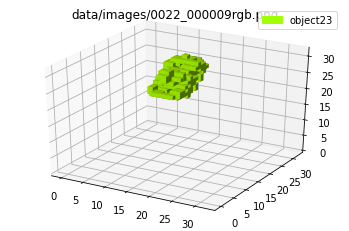

image 3/4 data/images/0022_000010rgb.png


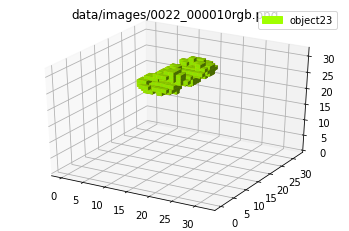

image 4/4 data/images/0022_000012rgb.png


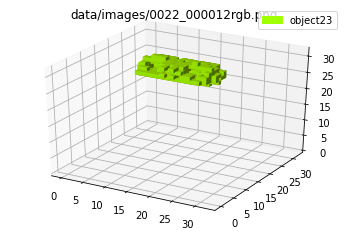

In [ ]:
from detect import detect
detect(config.DETECT_PATH)